# CUSTOMER SEGMENTATION

- ## IMPORT THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- ## CHECK FOR MISSING VALUES IN THE DATA

In [3]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Gender'].unique()
MALE = 1
FEMALE = 0

# VISUALIZATIONS

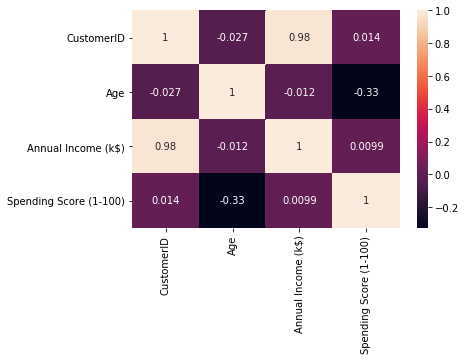

In [5]:
sns.heatmap(data.corr(),annot = True)

## HEATMAP IN COMBINATION WITH CORRELATION 
- ### THERE IS A STRONG CORRELATION BETWEEN THE INPUT FEATURES 'CustomerID' & 'Annual Income'
- ### HOWEVER THE 'CustomerID' & 'Annual Income' ARE ARRANGED IN ASCENDING ORDER
- ### HENCE THEY ARE HAVING A STRONG CORRELATION BETWEEN THEM
- ### THUS, WE CAN DROP 'CustomerID' 
- ### OTHERWISE THE FEATURES ARE NOT DEPENDENT ON EACH OTHER 

In [6]:
data = data.drop(columns = 'CustomerID')
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## PLOTS w.r.t GENDER 

In [7]:
df = data.groupby(data['Gender']).sum()
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,4267,6636,5771
Male,3503,5476,4269


In [8]:
male = [i for i in data['Gender'] if(i == 'Male')]
female = [i for i in data['Gender'] if(i == 'Female')]
size = []
size.append(len(male)/2)
size.append(len(female)/2)

- ### PERCENTAGE OF MEN & WOMEN IN THE DATA

([<matplotlib.patches.Wedge at 0x46ab2dd4c8>,
 [Text(-1.080515974257694, 0.206119454137514, 'Male'),
  Text(1.080515974257694, -0.20611945413751412, 'Female')],
 [Text(-0.5893723495951056, 0.11242879316591672, '44.0%'),
  Text(0.5893723495951056, -0.1124287931659168, '56.0%')])

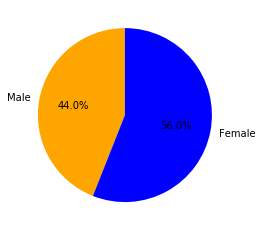

In [9]:
plt.pie(size,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,colors = ['Orange','Blue'])

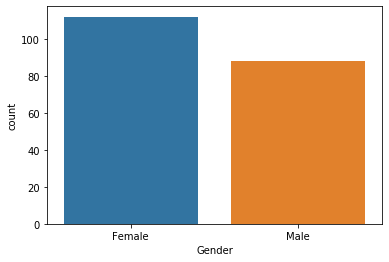

In [10]:
sns.countplot(x = data['Gender'],data = data,order = ['Female','Male'])

- NUMBER OF WOMEN IN THE DATA IS MORE THAN MEN

- ### SPENDING SCORE OF MEN VS WOMEN

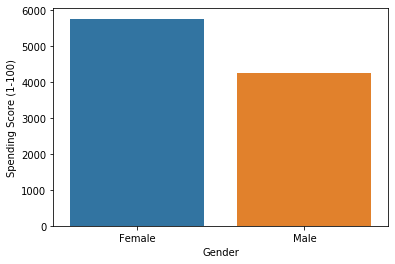

In [11]:
sns.barplot(x = df.index,y = 'Spending Score (1-100)',data = df)

In [12]:
total_spend = df.iloc[0,2] + df.iloc[1,2]
spend = []
spend.append((df.iloc[0,2]/total_spend)*100)
spend.append((df.iloc[1,2]/total_spend)*100)

([<matplotlib.patches.Wedge at 0x46ab3f7f48>,
 [Text(-1.0697674120143639, -0.2561204486020014, 'Female'),
  Text(1.0697674120143639, 0.2561204486020018, 'Male')],
 [Text(-0.5835094974623802, -0.13970206287381892, '57.5%'),
  Text(0.5835094974623802, 0.13970206287381912, '42.5%')])

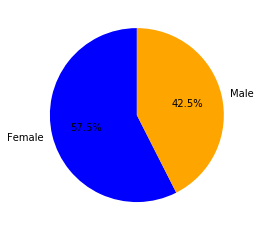

In [13]:
plt.pie(spend,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,colors = ['Blue','Orange'])

- ### ANNUAL INCOME OF MEN VS WOMEN

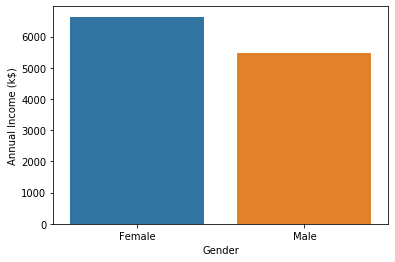

In [14]:
sns.barplot(x = df.index,y ='Annual Income (k$)',data = df)

In [15]:
total_income = df.iloc[0,1] + df.iloc[1,1]
income = []
income.append((df.iloc[0,1]/total_income)*100)
income.append((df.iloc[1,1]/total_income)*100)

([<matplotlib.patches.Wedge at 0x46ab4ad1c8>,
 [Text(-1.0875758392291535, -0.1648599221308885, 'Female'),
  Text(1.0875758546644487, 0.1648598203046888, 'Male')],
 [Text(-0.5932231850340837, -0.08992359388957552, '54.8%'),
  Text(0.5932231934533355, 0.08992353834801206, '45.2%')])

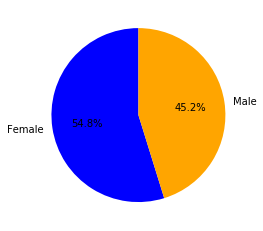

In [16]:
plt.pie(income,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,colors = ['Blue','Orange'])

- ### THE ABOVE PLOTS CLEARLY SHOW THAT WOMEN ACCOUNT MORE IN SPENDING SCORE & TOTAL INCOME
- ### THIS IS CLEARLY BECAUSE OF THE MORE NUMBER OF WOMEN

## DISTRIBUTION OF DATA w.r.t AGE & GENDER

- ### SPENDING SCORE vs AGE

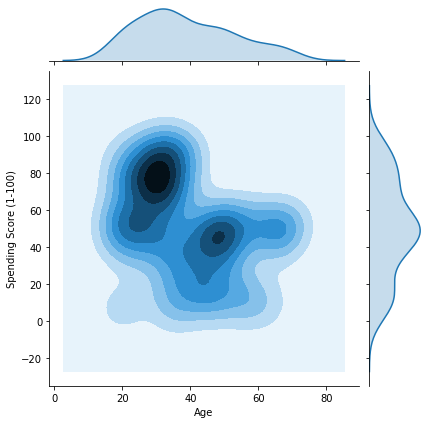

In [17]:
sns.jointplot('Age','Spending Score (1-100)',data=data,kind = 'kde')

- ### ANNUAL INCOME vs AGE

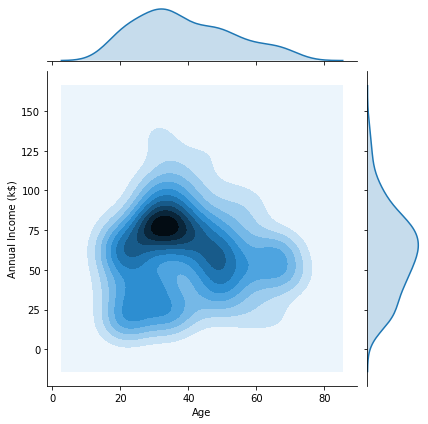

In [18]:
sns.jointplot('Age','Annual Income (k$)',data= data,kind = 'kde')

- ### AGE vs GENDER

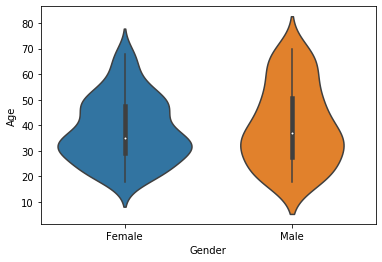

In [19]:
sns.violinplot('Gender','Age',data=data,order= ['Female','Male'])

- ### SPENDING SCORE VS GENDER

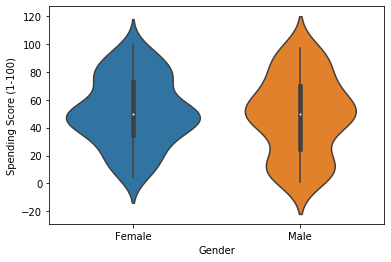

In [20]:
sns.violinplot('Gender','Spending Score (1-100)',data = data,order = ['Female','Male'])

- ### ANNUAL INCOME vs GENDER

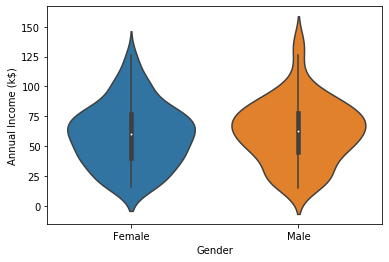

In [21]:
sns.violinplot('Gender','Annual Income (k$)',data = data,order = ['Female','Male'])

- ## SPENDING SCORE VS ANNUAL INCOME w.r.t GENDER

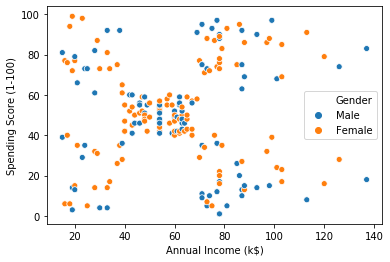

In [22]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',data = data,hue = 'Gender')

# SEGMENTATION

- # 2 METHODS TO DECIDE THE NUMBER OF CLUSTERS FOR KMEANS
- ## 1] ELBOW METHOD:-
- #### FROM THE GRAPH OF ELBOW METHOD,WE SELECT THE VALUE WHICH RESEMBLES 
- #### LIKE AN ELBOW OF A HAND AS THE NUMBER OF CLUSTERS
- ## 2] SILHOUETTE SCORE:-
- #### IT IS THE METRIC WHICH TELLS US ABOUT HOW THE CLUSTER 
- #### HAS GROUPED WELL WITH POINTS AROUND IT & HOW IT HAS BEEN 
- #### DIFFERENTIATED WELL FROM OTHER CLUSTERS.
- #### WE SELECT THE NUMBER OF CLUSTERS WHICH HAS THE HIGHEST SILHOUETTE SCORE. 

## 1] AGE & SPENDING SCORE

In [23]:
d1 = data[['Age','Spending Score (1-100)']].values

### A] ELBOW METHOD

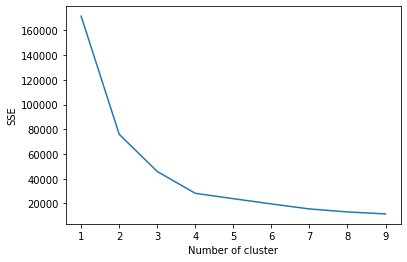

In [24]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(d1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### B] SILHOUETTE SCORE

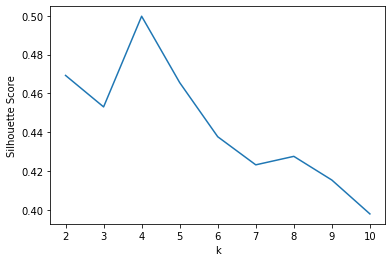

In [25]:
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(d1)
    labels = kmeans.labels_
    sil.append(silhouette_score(d1, labels, metric = 'euclidean'))
plt.figure()
plt.plot(range(2,kmax+1),sil)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

- ## CLUSTERS = 4

Text(0, 0.5, 'SPENDING SCORE')

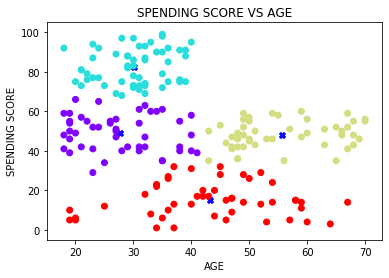

In [26]:
model = KMeans(n_clusters = 4,max_iter = 1000)
model.fit(d1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
plt.scatter(centroids[:,0],centroids[:,1], marker="X", color = 'b')
plt.scatter('Age','Spending Score (1-100)',c=labels,cmap ='rainbow',data = data)
plt.title('SPENDING SCORE VS AGE')
plt.xlabel('AGE')
plt.ylabel('SPENDING SCORE')

## 2] ANNUAL INCOME & SPENDING SCORE

In [27]:
d2 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].values

### A] ELBOW METHOD

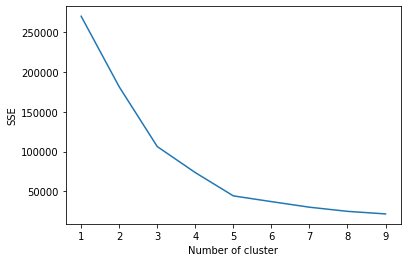

In [28]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(d2)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### B] SILHOUETTE SCORE

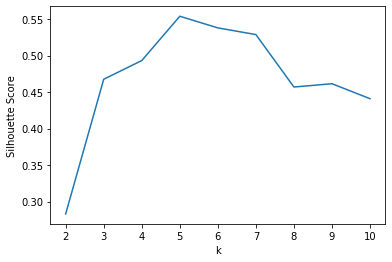

In [29]:
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(d2)
    labels = kmeans.labels_
    sil.append(silhouette_score(d2, labels, metric = 'euclidean'))
plt.figure()
plt.plot(range(2,kmax+1),sil)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

- ## CLUSTERS = 5

Text(0, 0.5, 'SPENDING SCORE')

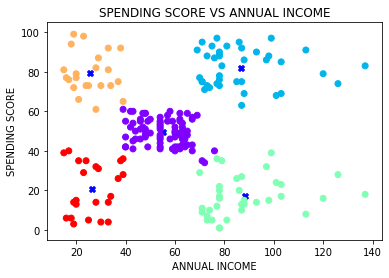

In [30]:
model = KMeans(n_clusters = 5,max_iter = 1000)
model.fit(d2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
plt.scatter(centroids[:,0],centroids[:,1], marker="X", color = 'b')
plt.scatter('Annual Income (k$)','Spending Score (1-100)',c=labels,cmap ='rainbow',data = data)
plt.title('SPENDING SCORE VS ANNUAL INCOME')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')

- ## 3] AGE,ANNUAL INCOME & SPENDING SCORE

In [31]:
d3 = data[['Age','Annual Income (k$)','Spending Score (1-100)']].values

### A] ELBOW METHOD

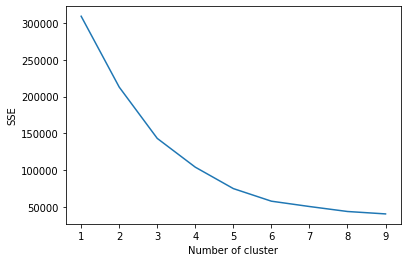

In [32]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(d3)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### B] SILHOUETTE SCORE

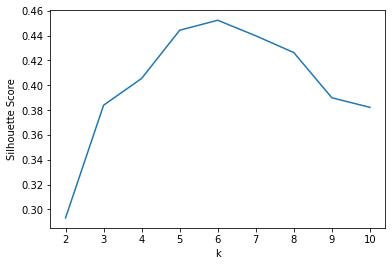

In [33]:
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(d3)
    labels = kmeans.labels_
    sil.append(silhouette_score(d3, labels, metric = 'euclidean'))
plt.figure()
plt.plot(range(2,kmax+1),sil)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

- ## CLUSTERS = 6

In [34]:
model = KMeans(n_clusters = 6,max_iter = 1000)
model.fit(d3)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

Text(0.5, 0, 'AGE')

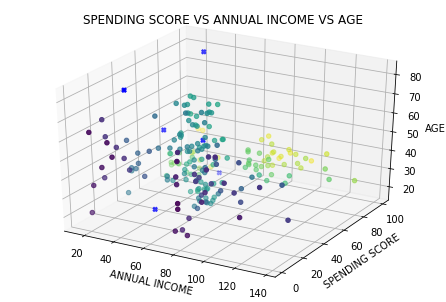

In [35]:
fig = plt.figure()
ax = Axes3D(fig)
x = np.array(data['Annual Income (k$)'])
y = np.array(data['Spending Score (1-100)'])
z = np.array(data['Age'])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
ax.scatter(x,y,z,c=y)
plt.title('SPENDING SCORE VS ANNUAL INCOME VS AGE')
ax.set_xlabel('ANNUAL INCOME')
ax.set_ylabel('SPENDING SCORE')
ax.set_zlabel('AGE')

# END